<a href="https://colab.research.google.com/github/emnaNaitIbourk/PRODIGY_GA_02/blob/main/image_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install --upgrade pip
!pip -q install diffusers==0.30.0 transformers accelerate torch safetensors
!pip -q install streamlit pyngrok==7.2.2


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

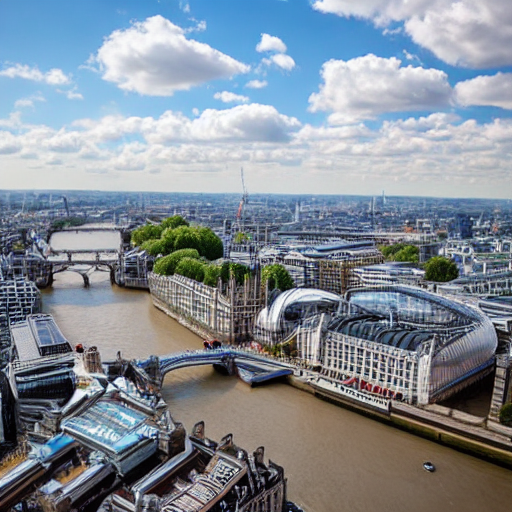

In [2]:
import torch
from diffusers import StableDiffusionPipeline
#identifying the pretrained model to be loaded
model_id="runwayml/stable-diffusion-v1-5"
#pick the right dtype for teh device
device="cuda" if torch.cuda.is_available() else "cpu"
dtype=torch.float16 if device=="cuda" else torch.float32
#donloading and building the pipeline with chosen dtype
pipe=StableDiffusionPipeline.from_pretrained(model_id,torch_dtype=dtype)
#move the model to the right device
pipe=pipe.to(device)
prompt="A nice view from London eye in London"
image=pipe(prompt,num_inference_steps=25,guidance_scale=7.5).images[0]
#save image to disk so it can be downloaded
image.save("image_generated.png")
#show it in notebook output
image




In [3]:
%%writefile app.py
import torch
from diffusers import StableDiffusionPipeline
import streamlit as st
st.set_page_config(page_title="Ai Image Generator",page_icon="🎨",layout="centered")
#hide the heavy model so it's not reloaded with every button click
@st.cache_resource
def load_model(model_id="runwayml/stable-diffusion-v1-5"):
  device="cuda"if torch.cuda.is_available() else "cpu"
  dtype=torch.float16 if device=="cuda" else torch.float32
  pipe= StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=dtype)
  pipe=pipe.to(device)
  return pipe
  #set page title
st.title=" 🎨Ai Image Generator"
st.write("Write a prompt,tweak settings and get an image using the pretftrained  StableDiffusion model.")
prompt=st.text_area("Prompt","an awesome web app that is used for teaching coding skills to students")
steps=st.slider("Inference_steps",10,75,25,help="Higher=better quality,slower.20-40 is typical.")
guidance=st.slider("Guidance scale",1.0,15.0,7.5,help="Higher= more literal to the prompt.(6-9 is common).")
  #Make a button that actually runs generation
if st.button("Generate"):
    if not prompt.strip():
      st.warnning("Please enter a prompt.")
    else:
       with st.spinner("Generating... this takes  from 10 to 30seconds on GPU ,longer on CPU"):
            pipe=load_model()
            result=pipe(
                prompt,
                num_inference_steps=int(steps),
                guidance_scale=float(guidance)
           )
            image=result.images[0]
            st.image(image,caption="Generated image",use_container_width=True)
            image.save("generated.png")
            st.download_button("Download image",data=open("generated.png","rb"),file_name="generated.png",mime="image/png")









Overwriting app.py


In [4]:
!streamlit run app.py &> /dev/null&

In [6]:
from pyngrok import ngrok
ngrok.set_auth_token("31KEfRtpjNt5NBwI442Fu4w57AO_5bViZBm4c6DXSvGTiud3u")


public_url=ngrok.connect(8501)
print("Public URL: ",public_url)

Public URL:  NgrokTunnel: "https://25d780d51b1c.ngrok-free.app" -> "http://localhost:8501"
